# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [5]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [6]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [7]:
df.shape

(147972, 21)

In [8]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [9]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


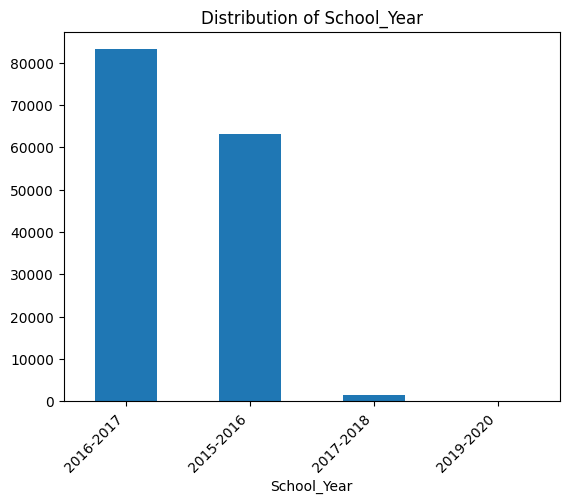

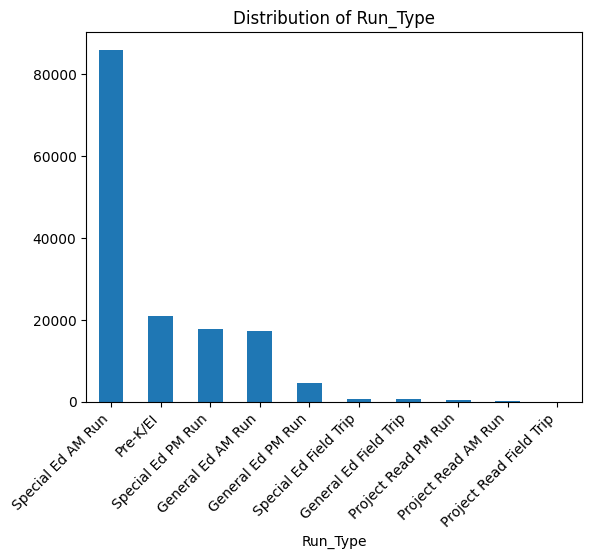

KeyboardInterrupt: 

In [ ]:
# Distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
  plt.figure()
  df[feature].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {feature}')
  plt.xticks(rotation=45, ha='right')
  plt.show()

In [ ]:
#Categorical feature analysis
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
  print(f"Feature: {feature}")
  print(df[feature].value_counts())
  print("-" * 30)

In [ ]:
# Correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Outlier detection
import matplotlib.pyplot as plt
#box plots
numerical_features = df.select_dtypes(include=['float', 'int']).columns
for feature in numerical_features:
  plt.figure()
  sns.boxplot(df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

# **Handle Missing Values**

In [ ]:
#show the missing value
df.isnull().sum()

In [ ]:
#drop How_Long_Delayed and Incident_Number
df = df.drop(['How_Long_Delayed', 'Incident_Number'], axis=1)
df = df.drop(['Reason', 'Route_Number'], axis=1)

In [ ]:
df.isnull().sum()

In [ ]:
# Convert 'Run_Type' to numeric type if it contains strings
df['Run_Type'] = pd.to_numeric(df['Run_Type'], errors='coerce')

# Replace null values in 'Run_Type' with the mean
df['Run_Type'].fillna(df['Run_Type'].mean(), inplace=True)

# Encode Categorical **Variables**

In [ ]:
import pandas as pd
# Define categorical columns for one-hot encoding
categorical_cols = ['School_Year', 'Run_Type', 'Schools_Serviced', 'Occurred_On',
                     'Created_On', 'Boro', 'Bus_Company_Name',
                     'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
                     'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
                     'School_Age_or_PreK']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['Breakdown_or_Running_Late'] = label_encoder.fit_transform(df_encoded['Breakdown_or_Running_Late'])

# **Scale and Normalize Data**

In [ ]:
#Standardization Z score
from sklearn.preprocessing import StandardScaler

#Select numerical columns for scaling
numerical_cols = ['Bus_No', 'Number_Of_Students_On_The_Bus']

#Create a StandardScaler object
scaler = StandardScaler()

#Fit the scaler to the numerical data and transform it
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [ ]:
#Min-Max scaling

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


# **Feature Engineering**

In [ ]:
#Create a new feature 'Total_Notifications'
df_encoded['Total_Notifications'] = df_encoded['Has_Contractor_Notified_Schools_Yes'] + \
                                   df_encoded['Has_Contractor_Notified_Parents_Yes'] + \
                                   df_encoded['Have_You_Alerted_OPT_Yes']

In [ ]:
#Feature selection
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
X = df_encoded.drop('Breakdown_or_Running_Late', axis=1)
y = df_encoded['Breakdown_or_Running_Late']

# Apply SelectKBest with chi squared test
selector = SelectKBest(chi2, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

print(X.columns[selected_features])

# **Handle Imbalanced Data**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Sample feature matrix 'X' and target variable 'y'
X = [[1, 2], [3, 4], [5, 6]]  # Sample feature data
y = [0, 1, 0]  # Sample target variable data

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [ ]:
#oversampling
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)


# **Handle Outliers**

In [ ]:
import numpy as np

# Assuming df_encoded is your DataFrame with the relevant data

# Calculate z-scores for all numerical columns
numerical_cols = ['Bus_No', 'Number_Of_Students_On_The_Bus']
z_scores = np.abs((df_encoded[numerical_cols] - df_encoded[numerical_cols].mean()) / df_encoded[numerical_cols].std())

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Filter the DataFrame to remove outliers
df_no_outliers = df_encoded[(z_scores < threshold).all(axis=1)]

In [ ]:
#Transform outliers

import numpy as np
# Assuming 'df_encoded' is your DataFrame and 'numerical_cols' are your numerical columns

for feature in numerical_cols:
  # Calculate IQR
  Q1 = df_encoded[feature].quantile(0.25)
  Q3 = df_encoded[feature].quantile(0.75)
  IQR = Q3 - Q1

  # Define outlier boundaries
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Capping outliers
  df_encoded[feature] = np.clip(df_encoded[feature], lower_bound, upper_bound)


# **Remove Duplicates**

In [ ]:
#Show duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

In [ ]:
#Remove duplicate data
df.drop_duplicates(inplace=True)

## **Split the Dataset**
Next, split the dataset into training, validation, and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#split train into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## **Building the ANN Model**
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
#Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  #Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## **Compile the Model**
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## **Training the Model**
Train the ANN model using the training data.

In [ ]:
# Train the model
epochs = 9
batch_size = 24
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

## **Evaluate the Model**
Evaluate the performance of the model on the test set.

In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

## **Make Predictions**
Use the trained model to make predictions on new or unseen data.

In [ ]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)
print(predicted_classes)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model_cnn.save('modle1.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

Q1/ normalization and encoding serve to whip the raw data into shape for the model. Normalization helps in scaling numerical features, aiding the model to converge faster during training. Encoding categorical variables ensures the model can handle non-numeric data